#Classification 
ANN



In [3]:
import pandas as pd
import tensorflow as tf

In [4]:
data = pd.read_csv('/content/stroke-data.csv')

In [5]:
data.dropna(inplace=True)

In [6]:
data = pd.get_dummies(data)

In [7]:
x = data.drop(['stroke'], axis=1)
y = data['stroke']


from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state= 42)

In [8]:
x_train.shape

(3927, 22)

In [9]:
x_train

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
3565,68302,40.0,0,0,65.77,31.2,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0
898,62716,59.0,0,0,81.64,32.8,1,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0
2707,46498,57.0,0,0,217.40,36.6,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0
4198,4148,81.0,0,0,71.18,23.9,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0
2746,35315,65.0,0,0,95.88,28.5,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4613,45530,19.0,0,0,89.30,22.1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0
511,27832,51.0,0,0,82.93,29.7,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1
3247,64498,53.0,0,0,90.65,22.1,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0
3946,8041,11.0,0,0,93.51,20.8,1,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0


In [10]:
y_train.shape

(3927,)

In [11]:
from tensorflow.keras.layers import Dense

In [12]:
model = tf.keras.Sequential()
model.add(Dense(30, activation='relu', input_dim=22))
model.add(Dense(40, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [13]:
model.fit(x_train, y_train, epochs=100)

Epoch 1/100
123/123 [==============================] - 1s 1ms/step - loss: 209.0940 - accuracy: 0.8732
Epoch 2/100
123/123 [==============================] - 0s 2ms/step - loss: 14.1681 - accuracy: 0.9132
Epoch 3/100
123/123 [==============================] - 0s 2ms/step - loss: 19.2665 - accuracy: 0.9127
Epoch 4/100
123/123 [==============================] - 0s 2ms/step - loss: 14.6948 - accuracy: 0.9157
Epoch 5/100
123/123 [==============================] - 0s 2ms/step - loss: 10.3144 - accuracy: 0.8989
Epoch 6/100
123/123 [==============================] - 0s 1ms/step - loss: 19.9916 - accuracy: 0.9155
Epoch 7/100
123/123 [==============================] - 0s 2ms/step - loss: 18.3814 - accuracy: 0.9251
Epoch 8/100
123/123 [==============================] - 0s 1ms/step - loss: 16.6284 - accuracy: 0.8969
Epoch 9/100
123/123 [==============================] - 0s 1ms/step - loss: 21.4438 - accuracy: 0.9269
Epoch 10/100
123/123 [==============================] - 0s 1ms/step - loss: 19.28

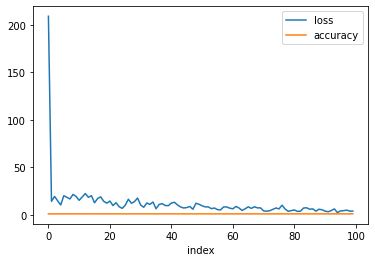

In [14]:
pd.DataFrame(model.history.history).reset_index().plot('index',kind='line')

In [15]:
import tensorflow as tf

In [16]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


#Regression
ANN


In [17]:
# importing essential libraries

import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential

In [18]:
# loading data

df = pd.read_csv('/content/car-price-data.csv').drop(['car_ID'], axis=1)
df = pd.get_dummies(df)
df.head(3)

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarName_Nissan versa,CarName_alfa-romero Quadrifoglio,CarName_alfa-romero giulia,CarName_alfa-romero stelvio,CarName_audi 100 ls,CarName_audi 100ls,CarName_audi 4000,CarName_audi 5000,CarName_audi 5000s (diesel),CarName_audi fox,CarName_bmw 320i,CarName_bmw x1,CarName_bmw x3,CarName_bmw x4,CarName_bmw x5,CarName_bmw z4,CarName_buick century,CarName_buick century luxus (sw),CarName_buick century special,CarName_buick electra 225 custom,CarName_buick opel isuzu deluxe,CarName_buick regal sport coupe (turbo),CarName_buick skyhawk,CarName_buick skylark,CarName_chevrolet impala,...,CarName_vw dasher,CarName_vw rabbit,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginelocation_front,enginelocation_rear,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


In [19]:
# data preprocessing

x = df.drop(['price'], axis=1)
y = df.price

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

minmax = MinMaxScaler()

x_train = minmax.fit_transform(x_train)
x_test = minmax.transform(x_test)

In [20]:
print("x_train.shape", x_train.shape, "y_train.shape", y_train.shape, "x_test.shape", x_test.shape, "y_test.shape", y_test.shape)

x_train.shape (143, 199) y_train.shape (143,) x_test.shape (62, 199) y_test.shape (62,)


In [21]:
# model development

model = Sequential()
model.add(Dense(400,activation='relu', input_dim=199))
model.add(Dense(200,activation='relu'))
model.add(Dense(1))
model.compile(optimizer='Adam', loss='mean_absolute_error', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=100, verbose=0)

In [22]:
# evaluate

model.evaluate(x_train)

5/5 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00


[0.0, 0.0]